In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download German stop words
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('german'))

# create a list of documents
documents = []



for file in os.listdir('comments_json_anonym'):
    text = ""

    with open('comments_json/'+file.split('_comments')[0]+'.txt','r',encoding='utf-8') as f:
        text += f.read()
    
    text += '\n'

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
            
    documents.append(" ".join(filtered_words))

# create the tf-idf vectorizer
vectorizer = TfidfVectorizer()

# fit the vectorizer to the documents
tfidf = vectorizer.fit_transform(documents)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\morit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


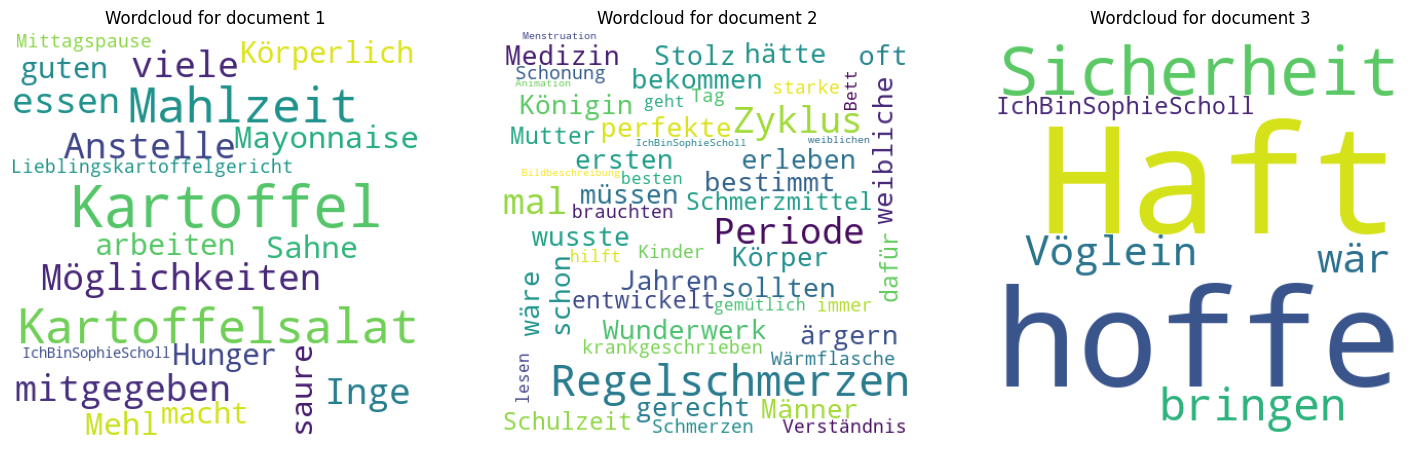

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs = [documents[177],documents[187],documents[382]]
# create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,8))

for doc_index in range(len(docs)):
    wordcloud = WordCloud(width = 400, height = 400,
        background_color ='white',
        stopwords = None,
        min_font_size = 10).generate(docs[doc_index])
    axs[doc_index].imshow(wordcloud)
    axs[doc_index].axis("off")
    axs[doc_index].set_title(f'Wordcloud for document {doc_index+1}')


plt.show()

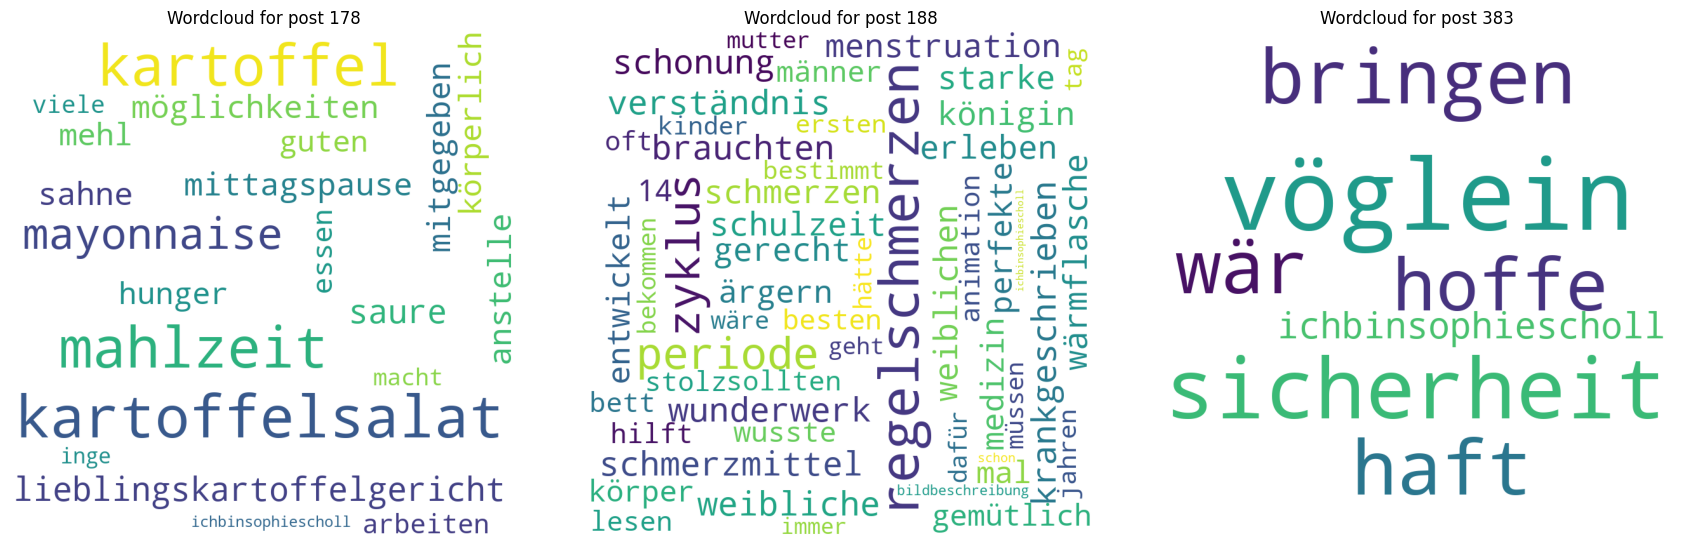

In [16]:
import pandas as pd

docids = [177,187,382]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,8))

for i,id in enumerate(docids):
        df = pd.DataFrame(tfidf[id].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
        df = df.sort_values('TF-IDF', ascending=False)
        doc_dict = df.to_dict()

        wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate_from_frequencies(doc_dict['TF-IDF'])
        axs[i].imshow(wordcloud)
        axs[i].axis("off")
        axs[i].set_title(f'Wordcloud for post {id+1}')
# Plot the wordcloud
plt.axis("off")
plt.tight_layout(pad = 5)
plt.show()

In [17]:
top_20_terms = {}
for id in range(len(documents)):
    test = pd.DataFrame(tfidf[id].T.todense(),index=vectorizer.get_feature_names_out(),columns=["TF-IDF"])
    test = test.sort_values("TF-IDF",ascending=False)
    top_20_terms[id+1] = test.head(20).index

In [18]:
test = pd.DataFrame.from_dict(top_20_terms).replace("hib4mKmHA-vgwtwb0Q_04A==","IBSS").T
test.to_csv('./top20-terms-per-doc_tf-idf_caption-only.csv')
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,ichbinsophiescholl,0003,reist,renée,reneesintenis,remppis,remilitarisierung,religiös,rektor,rekrutenausbildung,rekonstruierbar,reizen,reisevorbereitungen,requests,reiseroute,reisepläne,reisenden,reisen,reiselust,reisegefährtin
2,ichbinsophiescholl,0003,reist,renée,reneesintenis,remppis,remilitarisierung,religiös,rektor,rekrutenausbildung,rekonstruierbar,reizen,reisevorbereitungen,requests,reiseroute,reisepläne,reisenden,reisen,reiselust,reisegefährtin
3,ichbinsophiescholl,0003,reist,renée,reneesintenis,remppis,remilitarisierung,religiös,rektor,rekrutenausbildung,rekonstruierbar,reizen,reisevorbereitungen,requests,reiseroute,reisepläne,reisenden,reisen,reiselust,reisegefährtin
4,inge,bett,gute,schwester,große,mirabellenkuchen,verfüttert,harmoniemonster,bibbernd,gekrochen,hübsche,umgekehrt,maus,geschrien,eher,richtiges,beschützerin,häufchen,vernünftig,sag
5,fritz,vaterland,iller,grimassen,offizier,auftauchen,berühren,fremd,untergehen,wärme,einfache,wisst,sehnsucht,spüre,schneiden,wasser,fürs,mitten,ach,ostfront
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,verurteilt,anzeigen,gefängnis,grimminger,hirzel,1916,1924,freundin,rose,zuchthaus,dumme,02,1919,jahren,sogenannten,heinrich,harnack,dr,schutz,eugen
398,gründet,1972,september,1946,otl,inge,rose,ab,später,geschwister,weiße,zusammen,urheber,angabe,1952,besucher,1991,1998,kommunikation,piktogramms
399,leipelt,chemischen,hans,institut,wieland,großmutter,mutter,innen,flugblatt,hamburger,festgenommen,weißen,stirbt,hamburg,rose,universität,wehrmacht,letzte,wurde,instituts
400,deutsche,marburg,rose,weiße,hinrichtung,geschichte,deutschland,1943,200,abwirft,hessisches,ländern,nr,lokalen,gräueltaten,radiosendung,clara,bbc,kreisauer,staatsarchiv
